In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras


importing datsets from keras

In [ ]:
(x_train,y_train),(x_test,y_test) =tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
x_train.shape

(50000, 32, 32, 3)

three dimensional dataset 32*32 bit and containg RGB

In [ ]:
def get_image(index):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(10,1))
    img=plt.imshow(x_train[index])
    return img

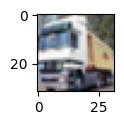

In [ ]:
get_image(1)

In [ ]:
y_train[1]

array([9], dtype=uint8)

In [ ]:
len(np.unique(y_train))

10

In [ ]:
import numpy as np
unique_labels = np.unique(y_train)
print("Number of unique labels in y_train:", unique_labels)


Number of unique labels in y_train: [0 1 2 3 4 5 6 7 8 9]


adding classes

In [ ]:
classes=["airpalne","automobile","bird","cat","dear","dog","frog","horse","ship","truck"]

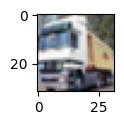

In [ ]:
get_image(1)

In [ ]:
classes[y_train[1][0]]

'truck'

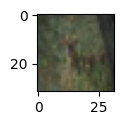

In [ ]:
get_image(10)

In [ ]:
y_train[10]

array([4], dtype=uint8)

In [ ]:
classes[y_train[10][0]]

'dear'

Scalling

In [ ]:
x_train=x_train/255

In [ ]:
x_train

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [ ]:
x_test=x_test/255

In [ ]:
x_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [ ]:
x_test[0]

array([[[0.00242983, 0.00172241, 0.00075356],
        [0.00244521, 0.00170704, 0.0007228 ],
        [0.00253749, 0.00178393, 0.00078431],
        ...,
        [0.00210688, 0.00146098, 0.00055363],
        [0.00193772, 0.00139946, 0.00055363],
        [0.00178393, 0.00130719, 0.0005075 ]],

       [[0.00233756, 0.00172241, 0.00078431],
        [0.00232218, 0.00169166, 0.00061515],
        [0.00244521, 0.00175317, 0.00069204],
        ...,
        [0.0020915 , 0.00146098, 0.00047674],
        [0.00192234, 0.00139946, 0.00049212],
        [0.00183007, 0.00135333, 0.00052288]],

       [[0.00232218, 0.00169166, 0.0007228 ],
        [0.00232218, 0.00167628, 0.0005075 ],
        [0.00242983, 0.00170704, 0.00055363],
        ...,
        [0.00213764, 0.00150711, 0.00052288],
        [0.00199923, 0.00146098, 0.00052288],
        [0.00184544, 0.0013687 , 0.0005075 ]],

       ...,

       [[0.00104575, 0.00190696, 0.00272203],
        [0.00064591, 0.00153787, 0.00227605],
        [0.00047674, 0

In [ ]:
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


One hot encoding in keras for y_train and y_test

In [ ]:
y_train_encoded=keras.utils.to_categorical(y_train,num_classes=10)

In [ ]:
y_test_encoded=keras.utils.to_categorical(y_test,num_classes=10)

In [ ]:
y_train=y_train_encoded

In [ ]:
y_test=y_test_encoded

In [ ]:
y_test[0:5]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]])

In [ ]:
y_train[0:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [ ]:
classes[np.argmax(y_train[5][0])]

'airpalne'

creating simple Ann

In [ ]:
model=keras.Sequential([
keras.layers.Flatten(input_shape=(32,32,3)),
keras.layers.Dense(3000,activation="relu"),
keras.layers.Dense(1000,activation="relu"),
keras.layers.Dense(10,activation="sigmoid")
])
model.compile(optimizer="SGD",#adam=27 accuracy
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,y_train,epochs=1)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.3000 - loss: 1.9387


i used only one epoch to reduce time complexity so probably it gives minimal accuracy

In [ ]:
model.evaluate(x_train,y_train)

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3996 - loss: 1.6753


[1.6843279600143433, 0.3997800052165985]

In [ ]:
y_Pred=model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,1))
plt.imshow(x_test[1])

In [ ]:
classes

['airpalne',
 'automobile',
 'bird',
 'cat',
 'dear',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [ ]:
np.argmax(y_Pred[0])

4

In [ ]:
y_test[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

In [ ]:
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0990 - loss: 2.3058


[2.3058676719665527, 0.10010000318288803]

to get cpu and gpu of our local system

In [ ]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
def get_model():
     model=keras.Sequential([
     keras.layers.Flatten(input_shape=(32,32,3)),
     keras.layers.Dense(3000,activation="relu"),
     keras.layers.Dense(1000,activation="relu"),
     keras.layers.Dense(10,activation="sigmoid")
     ])
     model.compile(optimizer="SGD",#adam=27 accuracy
              loss="categorical_crossentropy",
              metrics=["accuracy"])
     return model

GPU connection in google colab it gives the o/p with in 6s

In [ ]:
tf.device('/gpu:0')
gpu_model=get_model()
gpu_model.fit(x_train,y_train,epochs=1)


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.3088 - loss: 1.9218


#cpu time for one epoch around 6 minutes
#gpu time for 1 epoch is just 6 seconds!!!